# **Project Background**

In the world of uncertainty, health insurance is one of the things that need to be considered, because of its ability to save us in situations where our health condition suddenly deteriorates. Health insurance worked by requiring users to pay regular amounts of money (premiums) to the insurance company. Then the premium is processed by the insurance company to pay the insured user's health bill. However, determining the premium value can be a challenge for the insurer because many factors can influence and increase the user's risk profile. 


Through this project, I will try to help analyze the variables that have a relationship with the premium value received by each user. The datasets contained the user's personal data such as age, gender, place of residence, number of children covered by the insurance, BMI value, and whether the user is a smoker or not.

***

### **Loading data and importing neccessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


***

### **1st step: Descriptive analytics**

To make an initial exploration, I will try to answer the following questions.

1. What is the average age of the users?
2. What is the average BMI score for the smoker category?
3. On average, which category has a higher BMI score? Male or female?
4. On average, which category charged higher? Smokers or non-smokers?
5. On average, which category charged higher? Smokers with BMI > 25 or non-smokers with BMI > 25

---

**1. What is the average age of the users?**

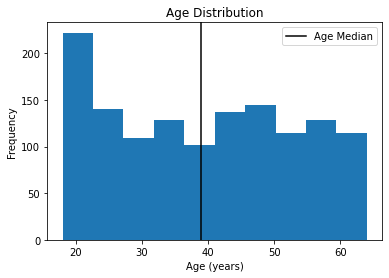

Age median: 39.0 years old


In [3]:
plt.hist(df['age'])

plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.axvline(df['age'].median(),color='black', label='Age Median')
plt.legend()

plt.show()
print(f'Age median: {df["age"].median()} years old')

Because the is not normally distributed, I take the median as the central tendency measurement. It turns out that the representative age of the data is 39 years old.

---

**2. What is the average BMI for the smoker category?**

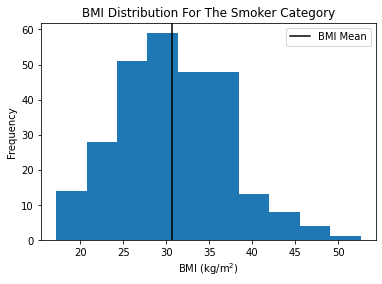

Smoker BMI mean: 30.708448905109503 kg/m^2


In [4]:
smoker = df.loc[df['smoker'] == 'yes']['bmi']

plt.hist(df.loc[df['smoker'] == 'yes']['bmi'])
plt.title('BMI Distribution For The Smoker Category')
plt.xlabel('BMI (kg/m$^2$)')
plt.ylabel('Frequency')
plt.axvline(smoker.mean(), color='black', label='BMI Mean')
plt.legend()

plt.show()

print(f'Smoker BMI mean: {smoker.mean()} kg/m^2')

According to the publication titled [BMI Classification Percentile And Cut Off Points](https://www.ncbi.nlm.nih.gov/books/NBK541070/), the smoker's group BMI in this dataset falls within the 'Obesity Class 1' category that ranges from 30-34.9 kg/$m^2$.

---

**3. On average, which categories have higher BMI? Male or female?**

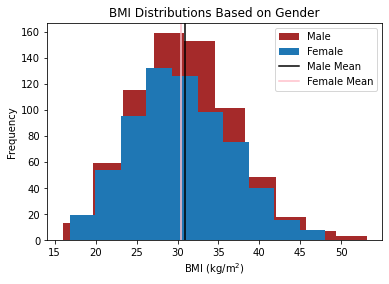

Male BMI Mean: 30.943128698224832 kg/m^2
Female BMI Mean: 30.377749244713023 kg/m^2


In [5]:
# Data for male BMI
male = df.loc[df['sex'] == 'male']['bmi']

# Data for female BMI
female = df.loc[df['sex'] == 'female']['bmi']

# Ploting the graph
plt.hist(male, label='Male', color='brown')
plt.hist(female, label='Female')
plt.title('BMI Distributions Based on Gender')
plt.xlabel('BMI (kg/m$^2$)')
plt.ylabel('Frequency')
plt.axvline(male.mean(), color='black', label='Male Mean')
plt.axvline(female.mean(),color='pink', label='Female Mean')
plt.legend()

plt.show()
print(f'Male BMI Mean: {male.mean()} kg/m^2',f'Female BMI Mean: {female.mean()} kg/m^2',sep='\n')

The average BMI mean for the two genders are similar, with the Male groups having a slightly higher BMI score than the Female groups. Both categories are also classified as obsessed, as their BMI score lies in the range of the 'Obesity Class 1' category that is defined in the publication titled [BMI Classification Percentile And Cut Off Points](https://www.ncbi.nlm.nih.gov/books/NBK541070/).

---

**4. On average, which category charged higher? Smokers or non-smokers?**

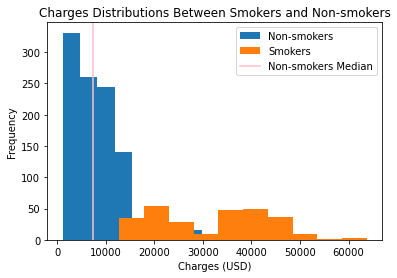

Average Smokers charged: $39790.0 USD
Average Non-smokers charged: $7345.4053 USD
Charge differences: 541.6991762183633%


In [38]:
smokers = df.loc[df['smoker'] == 'yes']['charges']
non_smokers = df.loc[df['smoker'] == 'no']['charges']

# Ploting the graph
plt.hist(non_smokers,label='Non-smokers')
plt.hist(smokers,label='Smokers')
plt.title('Charges Distributions Between Smokers and Non-smokers')
plt.xlabel('Charges (USD)')
plt.ylabel('Frequency')

plt.axvline(non_smokers.median(),color='pink', label='Non-smokers Median')

# Looking for smokers group mode
discrete_charges = pd.cut(smokers, bins=np.arange(10000,80000,180)) # (39700, 39880)
smokers_charged = (39700+39880)/2 # Range of smokers group mode / 2

plt.legend()
plt.show()

# Calculating charge differences
charge_difference_1 = ((smokers_charged)/non_smokers.median())*100

print(
    f'Average Smokers charged: ${smokers_charged} USD',
    f'Average Non-smokers charged: ${non_smokers.median()} USD',
    f'Charge differences: {charge_difference_1}%',
    sep='\n'
)


Because the Smokers group have a bimodal distributions, here I will search for the global maximum and take it as the central tendency measurement (mode).


The average charge for the two categories differs, with the Smoker group, being approximately charged 5 times as much as the Non-smoker group

---

**5. On average, which category charged higher? Smokers with BMI > 25 or non-smokers with BMI > 25**

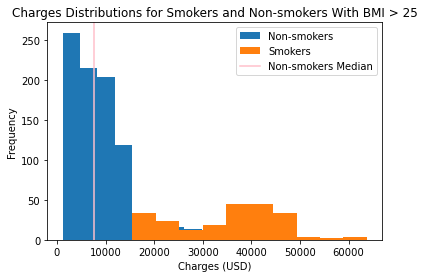

Smokers charged: 0    (39700, 39880]
Name: charges, dtype: category
Categories (388, interval[int64, right]): [(10000, 10180] < (10180, 10360] < (10360, 10540] < (10540, 10720] ... (79120, 79300] < (79300, 79480] < (79480, 79660] < (79660, 79840]]

Non-smokers charged: $7580.89695 USD
Charge differences: 524.8719282485432%


In [7]:
# Average charges of smokers with BMI > 25 
smokers = df.loc[(df['smoker'] == 'yes') & (df['bmi'] > 25)]['charges']

# Average charges of non-smokers with BMI > 25 
non_smokers = df.loc[(df['smoker'] == 'no') & (df['bmi'] > 25)]['charges']

# Graphing the distributions
plt.hist(non_smokers, label='Non-smokers')
plt.hist(smokers, label='Smokers')
plt.title('Charges Distributions for Smokers and Non-smokers With BMI > 25')
plt.xlabel('Charges (USD)')
plt.ylabel('Frequency')
plt.axvline(non_smokers.median(),color='pink', label='Non-smokers Median')

# Looking for the mode
discrete_charges = pd.cut(smokers, bins=np.arange(10000,80000,180))

plt.legend()
plt.show()

# Calculating charge differences
smokers_charged = (39700+39880)/2 # Range of smokers group mode / 2
charge_difference_2 = ((smokers_charged)/non_smokers.median())*100
# charge_differences = ((charge_difference_1-charge_difference_2)/charge_difference_2)*100

print(f'Smokers charged: {discrete_charges.mode()}', f'Non-smokers charged: ${non_smokers.median()} USD', sep='\n\n')
print(f'Charge differences: {charge_difference_2}%')
# print(f'Charge differences before and after BMI>25 variable comes in: {charge_differences}')

The average charge for the two categories differs, with the Smoker group being approximately charged 524% as much as the Non-smoker group. 


Even though the average charge for the smoker group stays the same as before when we are not including the BMI score > 25 variable, the Non-smoker group has a slight increase in the overall average charges when the variable BMI score > 25 comes in.

---

### **Key Takeaways From The Descriptive Analytics**
1. The representative age for this data is 39 years old
2. On average, Male and Female representatives in this dataset are categorized as Obesity Class 1, as both male and female average BMI scores are 30.943128698224832
and 30.377749244713023 respectively. Both BMI scores fulfill the definition of obesity class 1 classification that ranges from 30-34.9 kg/$m^2$ which is defined in the publication titled [BMI Classification Percentile And Cut Off Points](https://www.ncbi.nlm.nih.gov/books/NBK541070/).
3. Smokers group is also classified in the Obesity Class 1 classification.
4. On average, the smoker's group charged $39,790.0 USD, which is approximately 5 times as the Non-smoker group, which on average charged approximately $7,345.4053 USD.
5. On average, smokers with a BMI score > 25 are charged $39,790.0 USD which is the same as the average charges for the smoker group. However, there is a slightly increased in average charges for the Non-smoker group, whereas the Non-smoker group with BMI scores> 25 on average charged $7,580.89695, which is approximately 3% higher than the Non-smoker group.

---

### **2nd step: Categoric Variable Analysis**

In this step, I will try to answer the following questions.

1. On average, which gender charged higher?
2. Which proportion is higher, the smoker or non-smoker group?
3. How is the charge distribution in each region?
4. What is the probability that someone is a female given that we know that this someone is a smoker?
5. What is the probability that someone is a male given that we know that this someone is a smoker?

---

**1. On average, which gender charged higher?**

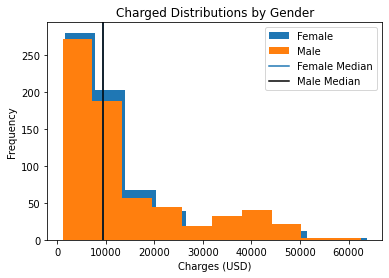

Female Median Charges: $9412.9625 USD
Male Median Charges: $9369.61575 USD


In [8]:
male=df.loc[df['sex']=='male']['charges']
female=df.loc[df['sex']=='female']['charges']

plt.hist(female,label='Female')
plt.hist(male,label='Male')
plt.xlabel('Charges (USD)')
plt.ylabel('Frequency')
plt.axvline(male.median(),label='Female Median')
plt.axvline(male.median(),color='black',label='Male Median')

plt.title('Charged Distributions by Gender')
plt.legend()
plt.show()
print(f'Female Median Charges: ${female.median()} USD', f'Male Median Charges: ${male.median()} USD', sep='\n')

On average, the Female group is charged slightly higher than the Male group, with just a delta of approximately 43 dollar.

---

**2. Which proportion is higher, smoker group or non-smoker group?**

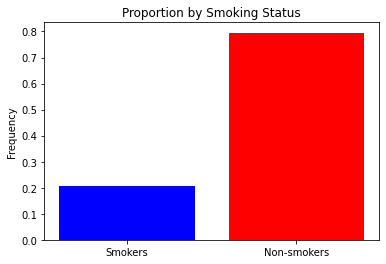

Smokers proportion: 0.20478325859491778
Non-smokers proportion: 0.7952167414050823


In [9]:
total_sample = df['smoker'].count()
smokers = df.loc[df['smoker']=='yes']['smoker'].count()/total_sample
non_smokers = df.loc[df['smoker']=='no']['smoker'].count()/total_sample


plt.bar(['Smokers', 'Non-smokers'],[smokers,non_smokers],color=['blue','red'])
plt.ylabel('Frequency')

plt.title('Proportion by Smoking Status')
plt.show()

print(f'Smokers proportion: {smokers}', f'Non-smokers proportion: {non_smokers}',sep='\n')

The non-smoker group is dominating the data with approximately 80% of the data being non-smokers.

---

**3. How is the charge distribution in each region?**

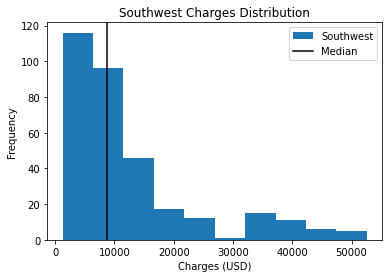

Southwest Charges Median: $8798.593 USD


In [10]:
southwest = df.loc[df['region']=='southwest']['charges']

plt.hist(southwest,label='Southwest')

plt.title('Southwest Charges Distribution')
plt.xlabel('Charges (USD)')
plt.ylabel('Frequency')
plt.axvline(southwest.median(), color='Black', label='Median')

plt.legend()
plt.show()

print(f'Southwest Charges Median: ${southwest.median()} USD')

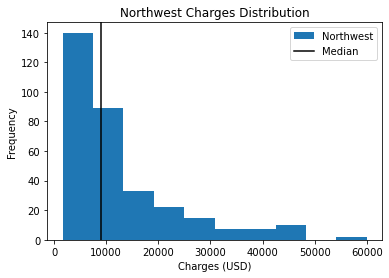

Northwest Charges Median: $8965.79575 USD


In [11]:
northwest = df.loc[df['region']=='northwest']['charges']
plt.hist(northwest,label='Northwest')

plt.title('Northwest Charges Distribution')
plt.xlabel('Charges (USD)')
plt.ylabel('Frequency')
plt.axvline(northwest.median(), color='Black', label='Median')

plt.legend()
plt.show()

print(f'Northwest Charges Median: ${northwest.median()} USD')

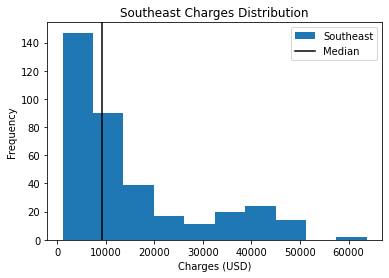

Southeast Charges Median: $9294.131949999999 USD


In [12]:
southeast = df.loc[df['region']=='southeast']['charges']
plt.hist(southeast,label='Southeast')

plt.title('Southeast Charges Distribution')
plt.xlabel('Charges (USD)')
plt.ylabel('Frequency')
plt.axvline(southeast.median(), color='Black', label='Median')

plt.legend()
plt.show()

print(f'Southeast Charges Median: ${southeast.median()} USD')


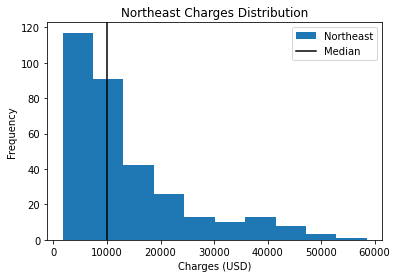

Northeast Charges Median: $10057.652025 USD


In [13]:
northeast = df.loc[df['region']=='northeast']['charges']
plt.hist(northeast,label='Northeast')

plt.title('Northeast Charges Distribution')
plt.xlabel('Charges (USD)')
plt.ylabel('Frequency')
plt.axvline(northeast.median(), color='Black', label='Median')

plt.legend()
plt.show()

print(f'Northeast Charges Median: ${northeast.median()} USD')

Charge distribution in each region is pretty much the same, with all of the regions tending to have a positively skewed distribution. The median for each region was ranked descendingly as follows:
1. Northeast: $10,057.652025 USD
2. Southeast: $9,294.131949999999 USD
3. Northwest: $8,965.79575 USD
4. Southwest: $8,798.593 USD

---

**4. What is the probability that someone is a female given that we know that this someone is a smoker?**

In [41]:
total_smoker = df.loc[df['smoker'] == 'yes']['smoker'].count()
female_and_smoker = df.loc[(df['sex'] == 'female') & (df['smoker'] == 'yes')]['smoker'].count()
result = female_and_smoker/total_smoker

print(
    f'Total people who is a smoker: {total_smoker}',
    f'Total people who is a female and a smoker: {female_and_smoker}',
    f'P(Female|Smoker): {result}',
    sep = '\n'
)


Total people who is a smoker: 274
Total people who is a female and a smoker: 115
P(Female|Smoker): 0.4197080291970803


---

**5. What is the probability that someone is a male given that we know that this someone is a smoker?**

In [43]:
total_smoker = df.loc[df['smoker'] == 'yes']['smoker'].count()
male_and_smoker = df.loc[(df['sex'] == 'male') & (df['smoker'] == 'yes')]['smoker'].count()
result = male_and_smoker/total_smoker

print(
    f'Total people who is a smoker: {total_smoker}',
    f'Total people who is a male and a smoker: {male_and_smoker}',
    f'P(Male|Smoker): {result}',
    sep='\n'
)

Total people who is a smoker: 274
Total people who is a male and a smoker: 159
P(Male|Smoker): 0.5802919708029197


---

### **Key Takeaways From The Categoric Variable Analysis**

1. On average, the Female group is charged 9,412.9625 USD, which is slightly higher than the Male group which is charged 9,369.61575 USD. The average charges differ by approximately $43.
2. Approximately 80% of the data are non-smoker users.
3. Charges distribution in each region is pretty much the same, with all of the regions tending to have a positively skewed distribution. The median for each region was ranked descendingly as follows:
    - Northeast: $10,057.652025 USD
    - Southeast: $9,294.131949999999 USD
    - Northwest: $8,965.79575 USD
    - Southwest: $8,798.593 USD
4. When we already have information that someone in the data is a smoker, there is approximately 58% probability that this someone is a male

---

### **3rd Step: Continous Variable Analysis**

In this step, I will try to answer the following questions.

1. What is the probability that people who have 'Normal Weight' according to the publication titled [BMI Classification Percentile And Cut Off Points](https://www.ncbi.nlm.nih.gov/books/NBK541070/) be charged for more than the average charges?
2. If the person is a smoker, what is the probability that he/she will be charged for > $16,700 USD?
3. Which is more likely to happen, person with BMI score > 25 get charged for > $16,700 USD or people with BMI score < 25 get charged for > $16,700 USD?
4. Which is more likely to happen, smokers get charged for > $16,700 USD or non-smokers get charged for > $16,700 USD?

---

**1. What is the probability that people who have 'Normal Weight' be charged for more than the average charges?**

First, I would like to know how is the distribution for the charges going and what is the average charge in this dataset.

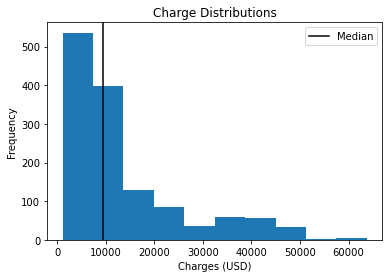

Charge median: $9382.033 USD


In [16]:
charges = df['charges']

plt.hist(charges)
plt.title('Charge Distributions')
plt.xlabel('Charges (USD)')
plt.ylabel('Frequency')
plt.axvline(charges.median(), color='black', label='Median')
plt.legend()

plt.show()
print(f'Charge median: ${charges.median()} USD')

Now that we know the average charges in this data, we can then find the probability for normal-weight people to be charged for more than the average charges.


In the publication titled [BMI Classification Percentile And Cut Off Points](https://www.ncbi.nlm.nih.gov/books/NBK541070/), people who are categorized as having a normal weight have a BMI score that falls within the range of 18.5 to 24.9 kg/$m^2$. Thus, we will search for the probability that people with BMI score more than 18.5 and less than 24.9 kg/$m^2$ be charged more than $9,382.033 USD

In [17]:

numerator = df.loc[(df['bmi'] > 18.5) & (df['bmi'] < 24.9) & (df['charges'] > charges.median())]['bmi'].count()
denominator = df.loc[(df['bmi'] > 18.5) & (df['bmi'] < 24.9)]['bmi'].count()

result = numerator/denominator

print(f'Total people in the datasets that have BMI score > 18.5 and < 24.9 kg/m^2 and charged more than average: {numerator}')
print(f'Total people in the datasets that have BMI score > 18.5 and < 24.9 kg/m^2: {denominator}')
print(f'P(Charged more than average | BMI < 25): {result}')

Total people in the datasets that have BMI score > 18.5 and < 24.9 kg/m^2 and charged more than average: 101
Total people in the datasets that have BMI score > 18.5 and < 24.9 kg/m^2: 221
P(Charged more than average | BMI < 25): 0.45701357466063347


Out of all 221 people in this dataset that have BMI scores> 18.5  and < 24.9 kg/$m^2$, 101 of them are charged more than the average charge of $9,382.023 USD. Thus, a person that is categorized as having a 'Normal Weight' based on the publication titled [BMI Classification Percentile And Cut Off Points](https://www.ncbi.nlm.nih.gov/books/NBK541070/) has a probability of approximately 45.7% to be charged more than the average charges.

---

**2. If the person is a smoker, what is the probability that he/she will be charged for > $16,700 USD?**

In [18]:
numerator = df.loc[(df['smoker'] == 'yes') & (df['charges'] > 16700)]['charges'].count()
denominator = df.loc[df['smoker'] == 'yes']['smoker'].count()

result = numerator/denominator

print(f'Total people in the datasets that smokes and is charged above $16.7k USD: {numerator}')
print(f'Total people in the datasets that smokes: {denominator}')
print(f'P(Charged > $16.7k USD | Smoker): {result}')

Total people in the datasets that smokes and is charged above $16.7k USD: 254
Total people in the datasets that smokes: 274
P(Charged > $16.7k USD | Smoker): 0.927007299270073


Out of all 274 people in this dataset that smokes, 254 of them are charged more than $16,700 USD. Thus, a person that smokes has a probability of approximately 92.7% to be charged more than $16,700 USD

---

**3. Which is more likely to happen, person with BMI score > 25 get charged for > $16,700 USD or people with BMI score < 25 get charged for > $16,700 USD?**

In [46]:
# Calculating the probability for the first category, BMI score > 25 charged for > $16,700 USD
bmi_more_than_25_and_charged = df.loc[(df['bmi'] > 25) & (df['charges'] > 16700)]['charges'].count()
bmi_more_than_25 = df.loc[df['bmi'] > 25]['bmi'].count()
p_bmi_more_than_25 = bmi_more_than_25_and_charged/bmi_more_than_25


# Calculating the probability for the second category, BMI score < 25 charged for > $16,700 USD
bmi_less_than_25_and_charged = df.loc[(df['bmi'] < 25) & (df['charges'] > 16700)]['charges'].count()
bmi_less_than_25 = df.loc[df['bmi'] < 25]['bmi'].count()
p_bmi_less_than_25 = bmi_less_than_25_and_charged/bmi_less_than_25

print(
    f'Total people with BMI > 25 and charged > $16.7k: {bmi_more_than_25_and_charged}',
    f'Total people with BMI > 25: {bmi_more_than_25}',
    f'P(Charged > $16.7k USD | BMI score > 25 kg/m^2): {p_bmi_more_than_25}',
    sep='\n'
)

print('')

print(
    f'Total people with BMI < 25 and charged > $16.7k: {bmi_less_than_25_and_charged}',
    f'Total people with BMI < 25: {bmi_less_than_25}',
    f'P(Charged > $16.7k USD | BMI score < 25 kg/m^2): {p_bmi_less_than_25}',
    sep='\n'
)

Total people with BMI > 25 and charged > $16.7k: 283
Total people with BMI > 25: 1091
P(Charged > $16.7k USD | BMI score > 25 kg/m^2): 0.25939505041246563

Total people with BMI < 25 and charged > $16.7k: 51
Total people with BMI < 25: 245
P(Charged > $16.7k USD | BMI score < 25 kg/m^2): 0.20816326530612245


We can see that it is more likely for someone to be charged more than $16,700k USD if they have a BMI score > 25 kg/$m^2$ than for someone who has BMI score < 25 kg/$m^2$.

---

**4. Which is more likely to happen, smokers get charged for > $16,700 USD or non-smokers get charged for > $16,700 USD?**

In [48]:
# Calculating the probability for the first category, smokers get charged for > $16,700 USD
smokers_and_charged = df.loc[(df['smoker'] == 'yes') & (df['charges'] > 16700)]['charges'].count()
smokers = df.loc[df['smoker'] == 'yes']['smoker'].count()
p_smokers_and_charged = smokers_and_charged/smokers

# Calculating the probability for the second category, non-smokers get charged for > $16,700 USD
non_smokers_and_charged = df.loc[(df['smoker'] == 'no') & (df['charges'] > 16700)]['charges'].count()
non_smokers = df.loc[df['smoker'] == 'no']['smoker'].count()
p_non_smokers_and_charged = non_smokers_and_charged/non_smokers

print(
    f'Total people that smokes and charged > $16.7k: {smokers_and_charged}',
    f'Total smokers: {smokers}',
    f'P(Charged > $16.7k USD | Smokers): {p_smokers_and_charged}',
    sep='\n'
)

print('')

print(
    f'Total non-smoking people that is charged > $16.7k: {non_smokers_and_charged}',
    f'Total non-smokers: {non_smokers}',
    f'P(Charged > $16.7k USD | Non-smokers): {p_non_smokers_and_charged}',
    sep='\n'
)

Total people that smokes and charged > $16.7k: 254
Total smokers: 274
P(Charged > $16.7k USD | Smokers): 0.927007299270073

Total non-smoking people that is charged > $16.7k: 80
Total non-smokers: 1064
P(Charged > $16.7k USD | Non-smokers): 0.07518796992481203


We can see that it is more likely for someone to be charged more than $16,700k USD if they are a smoker than for someone who is a non-smoker.

---

### **Key Takeaways From The Continous Variable Analysis**

1. People categorized as 'Normal Weight' (BMI score between 18.5 to 24.9 kg/$m^2$) based on the publication titled [BMI Classification Percentile And Cut Off Points](https://www.ncbi.nlm.nih.gov/books/NBK541070/) have a probability of approximately 45.7% to be charged more than the average charges of $9382.033 USD.
2. Out of all 274 people in this dataset who smoke, 254 of them are charged more than $16,700 USD. Thus, a person that smokes has a probability of approximately 92.7% to be charged more than $16,700 USD
3. It is more likely for someone to be charged more than $16,700k USD if they have a BMI score > 25 kg/$m^2$ than for someone who has BMI score < 25 kg/$m^2$. The probability is approximately 25.9%
4. It is more likely for someone to be charged more than $16,700k USD if they are a smoker than for someone who is a non-smoker. The probability is approximately 92.7% 


---

### **4th Step: Correlation Analysis**

Now is the time for analyzing the relationship and correlation between the charge variable with the other variables.

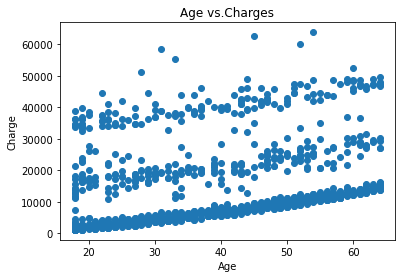

In [21]:
# Plotting Age and Charges in the scatter plot
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.title(('Age vs.Charges'))
plt.ylabel('Charge')

plt.show()

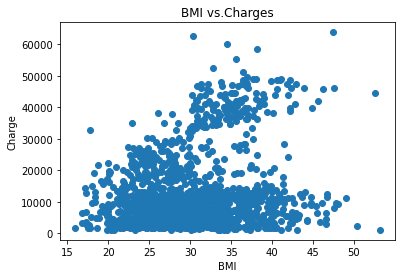

In [22]:
# Plotting BMI and Charges in the scatter plot
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.title(('BMI vs.Charges'))
plt.ylabel('Charge')

plt.show()

---

**Calculating Covariance**

In [23]:
df.cov()

,age,bmi,children,charges
age,197.401387,9.362337,0.719303,5.087480e+04
bmi,9.362337,37.187884,0.093795,1.464730e+04
children,0.719303,0.093795,1.453213,9.926742e+02
charges,50874.802298,14647.304426,992.674197,1.466524e+08


From the covariance, we know that:

1. There is a positive relationship between Age and Charges
2. There is a positive relationship between BMI score and Charges

However, we do not know whether this positive relation is relatively strong or relatively weak. To know that, we need to find Pearson's Correlation Coefficient for the related variables.

---

**Calculating Pearson's Correlation Coefficient**

In [24]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


From Pearson's Correlation Coefficient, we know that:

1. Age and Charges have approximately 0.3 correlation coefficient, which indicates that even though both variables have a positive relationship, the relationship is relatively weak. Thus for example, if we knew that someone's age is relatively high compared to the other age in the datasets (e.g. 50), it does not indicate that this person will be charged relatively high compared to the other charges in the datasets (e.g. above the average of $9382.033 USD.)

2. The same goes for the relationship between BMI score and charges. The correlation coefficient of approximately 0.2 is indicating a positive relationship but the relation is relatively weak.

---

### **5th Step: Hypothesis Testing**

The last step is to test several hypotheses related to the insurance charges. The hypothesis is:

1. Smokers are charged higher than non-smokers.
2. People with a BMI score > 25 are charged higher than people with BMI < 25.
3. Males are charged more than females.

----

**1. Smoker charged higher than Non-smoker.**

- h0: Average charged for Smoker >= Non-smoker
- h1: Average charged for Smoker < Non-Smoker
- Alpha: 0.05

In [25]:
# Initialize alpha
alpha = 0.05

In [26]:
# Looking at both category sample size provided by the datasets
n_smoker = len(df.loc[df['smoker'] == 'yes'])
var_smoker = df.loc[df['smoker'] == 'yes']['charges'].var()

n_non_smoker = len(df.loc[df['smoker'] == 'no'])
var_non_smoker = df.loc[df['smoker'] == 'no']['charges'].var()


print(f'Smoker sample size: {n_smoker}')
print(f'Smoker charges variance: {var_smoker}')

print('')

print(f'Non-smoker sample size: {n_non_smoker}')
print(f'Non-smoker charges variance: {var_non_smoker}')

Smoker sample size: 274
Smoker charges variance: 133207311.20634921

Non-smoker sample size: 1064
Non-smoker charges variance: 35925420.49611172


Since there's a relatively huge difference between the two sample sizes and their variance, I think it is more reliable to use the [Welch's T-test](https://en.wikipedia.org/wiki/Welch%27s_t-test) statistical test method in this case.

In [27]:
# Defining the variables
smoker = df.loc[df['smoker'] == 'yes']['charges']
non_smoker = df.loc[df['smoker'] == 'no']['charges']

# Calculting the mean value charge for smoker is less than the Non-smoker
stat,pvalue = stats.ttest_ind(smoker,non_smoker,alternative='less',equal_var = False)
print(f'P-value: {round(pvalue,3)}', f'T-Stat: {round(stat,3)}', sep='\n')

# Interpreting result
print('')
print('Decision:')

if pvalue > alpha:
    print('Failed to reject h0') 
else:
    print('Reject h0')


P-value: 1.0
T-Stat: 32.752

Decision:
Failed to reject h0


From Welch's T-test statistical test, the p-value is not in the area of rejection. Thus, we fail to reject the null hypothesis which states that on average, the Smoker group is charged higher or equal to the average charge for the Non-smoker group.

---

**2. People with BMI score > 25 charged higher than people with BMI < 25.**

- h0: (Average charged for people with BMI score > 25) >= (people with BMI score < 25)
- h1: (Average charged for people with BMI score > 25) < (people with BMI score < 25)
- Alpha: 0.05

In [28]:
# Initialize alpha
alpha = 0.05

In [29]:
# Looking at both category sample size provided by the datasets
n_bmi_mt_25 = len(df.loc[df['bmi'] > 25])
var_bmi_mt_25 = df.loc[df['bmi'] > 25]['charges'].var()

n_bmi_lt_25 = len(df.loc[df['bmi'] < 25])
var_bmi_lt_25 = df.loc[df['bmi'] < 25]['charges'].var()


print(f'People with BMI score > 25 sample size: {n_bmi_mt_25}')
print(f'People with BMI score > 25 charges variance: {var_bmi_mt_25}')

print('')

print(f'People with BMI score < 25 sample size: {n_bmi_lt_25}')
print(f'People with BMI score < 25 charges variance: {var_bmi_lt_25}')

People with BMI score > 25 sample size: 1091
People with BMI score > 25 charges variance: 164730179.60345617

People with BMI score < 25 sample size: 245
People with BMI score < 25 charges variance: 56557707.41605781


In [30]:
# Defining the variables
bmi_mt_25 = df.loc[df['bmi'] > 25]['charges']
bmi_lt_25 = df.loc[df['bmi'] < 25]['charges']

# Calculting the average charged for people with BMI score > 25 is less than people with BMI score < 25
stat,pvalue = stats.ttest_ind(bmi_mt_25, bmi_lt_25, alternative='less', equal_var = False)
print(f'P-value: {round(pvalue,3)}', f'T-Stat: {round(stat,3)}', sep='\n')

# Interpreting result
print('')
print('Decision:')

if pvalue > alpha:
    print('Failed to reject h0') 
else:
    print('Reject h0')


P-value: 1.0
T-Stat: 5.93

Decision:
Failed to reject h0


From Welch's T-test statistical test, the p-value is not in the area of rejection. Thus, we fail to reject the null hypothesis which states that on average, people with a BMI score >  25 are charged higher or equal to people with a BMI score < 25.

---

**3. Male charged more than female.**

- h0: Average charged for male >= average charge for female
- h1: Average charged for male < average charge for female
- Alpha: 0.05

In [31]:
# Initialize alpha
alpha = 0.05

In [32]:
# Looking at both category sample size provided by the datasets
n_male = len(df.loc[df['sex'] == 'male'])
var_male = df.loc[df['sex'] == 'male']['charges'].var()

n_female = len(df.loc[df['sex'] == 'female'])
var_female = df.loc[df['sex'] == 'female']['charges'].var()


print(f'Male sample size: {n_male}')
print(f'Male charges variance: {var_male}')

print('')

print(f'Female sample size: {n_female}')
print(f'Female charges variance: {var_female}')

Male sample size: 676
Male charges variance: 168247513.2881999

Female sample size: 662
Female charges variance: 123848048.28850958


Different than the hypothesis before, the sample size and the variance, in this case, are similar in both categories. We can use the regular T-test statistical test method in this case.

In [33]:
# Defining the variables
male = df.loc[df['sex'] == 'male']['charges']
female = df.loc[df['sex'] == 'female']['charges']

# Calculting the average charged for male is less than female
stat,pvalue = stats.ttest_ind(male, female, alternative='less')
print(f'P-value: {round(pvalue,3)}', f'T-Stat: {round(stat,3)}', sep='\n')

# Interpreting result
print('')
print('Decision:')

if pvalue > alpha:
    print('Failed to reject h0') 
else:
    print('Reject h0')


P-value: 0.982
T-Stat: 2.098

Decision:
Failed to reject h0


From the T-test statistical test, the p-value is not in the area of rejection. Thus, we fail to reject the null hypothesis which states that on average, the male is charged higher or equal to the female.

---

### **Key Takeaways From Testing Several Hypothesis**

1. We fail to reject the null hypothesis which states that on average, the Smoker group is charged higher or equal to the average charge for the Non-smoker group.
2. We fail to reject the null hypothesis which states that on average, people with a BMI score >  25 are charged higher or equal to people with a BMI score < 25.
3. We fail to reject the null hypothesis which states that on average, the male is charged higher or equal to the female.
